In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calls = pd.read_csv('./911.csv')

In [3]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
calls.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [6]:
calls.columns

Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')

In [7]:
calls['reason'] = calls['title'].apply(lambda title : title.split(':')[0])

In [8]:
calls['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

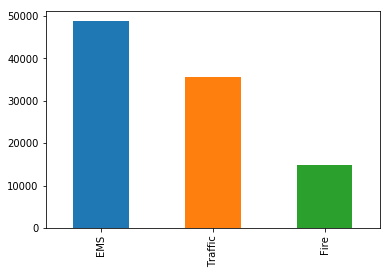

In [9]:
calls['reason'].value_counts().plot.bar()

In [10]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp'])

In [11]:
calls['month'] = calls['timeStamp'].apply(lambda time : time.month)
calls['hours'] = calls['timeStamp'].apply(lambda time : time.hour)
calls['dayOfWeek'] = calls['timeStamp'].apply(lambda time : time.dayofweek)

In [12]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [13]:
calls['dayOfWeek'] = calls.dayOfWeek.map(dmap)

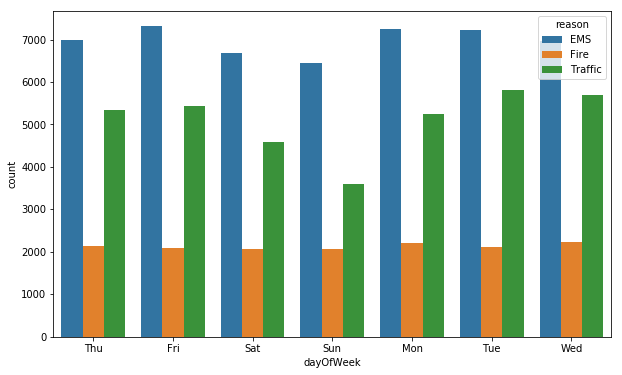

In [14]:
plt.figure(figsize=(10,6))
sns.countplot('dayOfWeek',data=calls,hue= 'reason')

In [15]:
monthMap = {1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'}
calls['month'] = calls.month.map(monthMap)
calls['month'].value_counts()

jan     13205
july    12137
jun     11786
feb     11467
may     11423
apr     11326
mar     11101
aug      9078
dec      7969
Name: month, dtype: int64

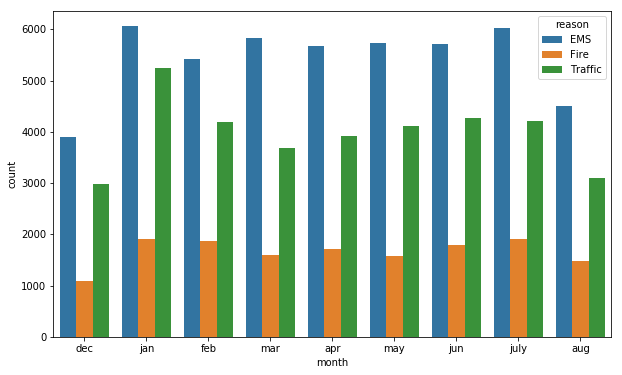

In [16]:
plt.figure(figsize=(10,6))
sns.countplot('month',data=calls,hue= 'reason')

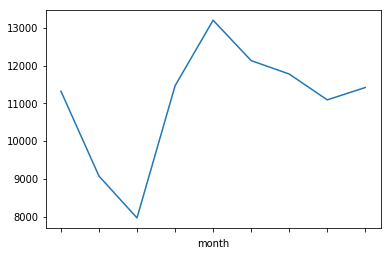

In [17]:
calls.groupby('month')['twp'].count().plot()

In [18]:
byMonth = calls.groupby('month').count().reset_index()
byMonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
month        9 non-null object
lat          9 non-null int64
lng          9 non-null int64
desc         9 non-null int64
zip          9 non-null int64
title        9 non-null int64
timeStamp    9 non-null int64
twp          9 non-null int64
addr         9 non-null int64
e            9 non-null int64
reason       9 non-null int64
hours        9 non-null int64
dayOfWeek    9 non-null int64
dtypes: int64(12), object(1)
memory usage: 1016.0+ bytes


In [19]:
calls['date'] = calls['timeStamp'].apply(lambda time : time.date())

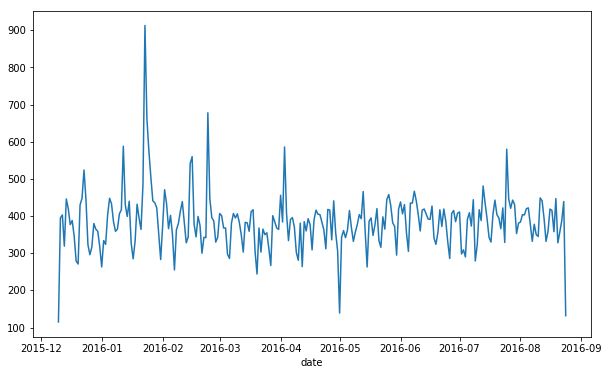

In [20]:
plt.figure(figsize=(10,6))
calls.groupby('date')['twp'].count().plot()

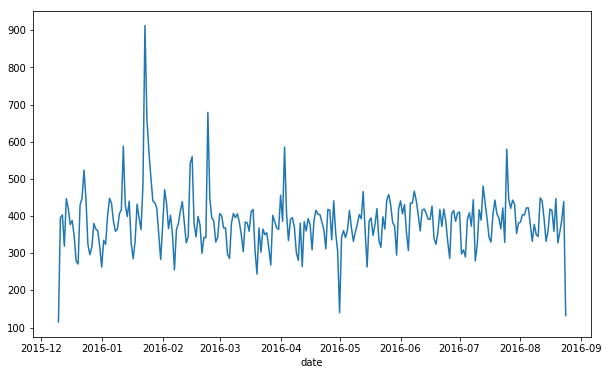

In [21]:
plt.figure(figsize=(10,6))
calls.groupby('date')['reason'].count().plot()

In [22]:
dayHour = calls.groupby(['dayOfWeek','hours']).count()['reason'].unstack()
dayHour.head()

hours,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


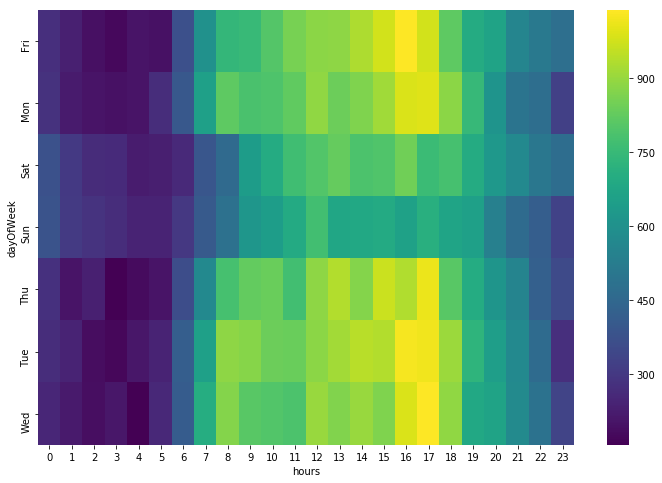

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(dayHour,cmap='viridis')

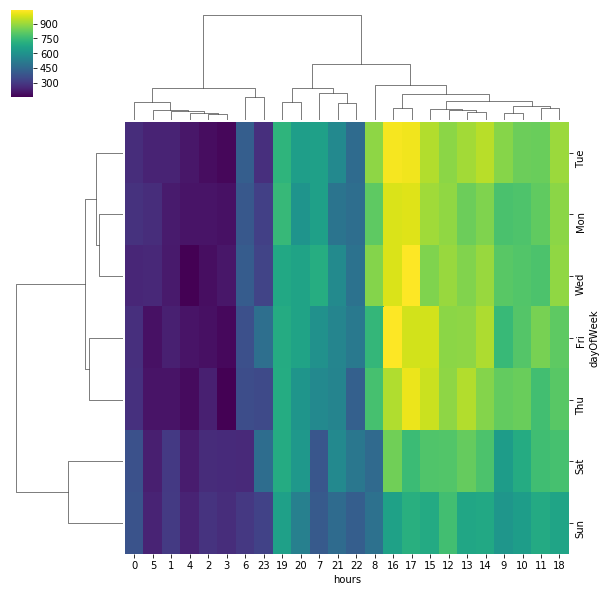

In [24]:
sns.clustermap(dayHour,cmap='viridis')

In [25]:
dayMonth = calls.groupby(by=['dayOfWeek','month']).count()['reason'].unstack()
dayMonth.head()

month,apr,aug,dec,feb,jan,july,jun,mar,may
dayOfWeek,,,,,,,,,
Fri,1958,1310,1065,1581,1970,2045,1649,1525,1730
Mon,1598,1511,1257,1964,1727,1692,1617,1535,1779
Sat,1734,1099,978,1441,2291,1695,1388,1266,1444
Sun,1488,1021,907,1229,1960,1672,1333,1102,1424
Thu,1601,1230,1266,1596,1584,1646,2065,1900,1590


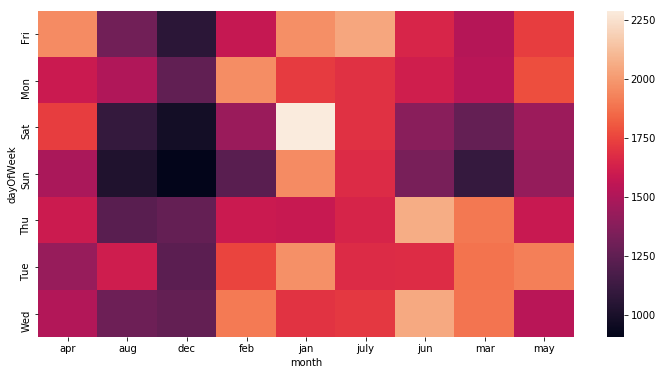

In [26]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth)

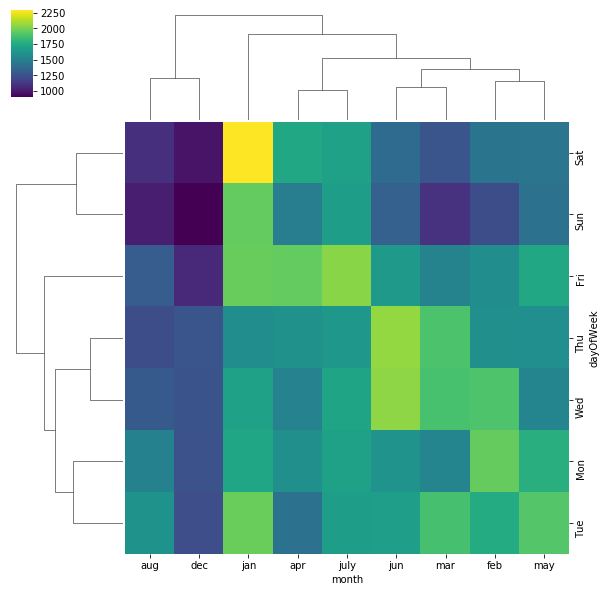

In [27]:
sns.clustermap(dayMonth,cmap='viridis')